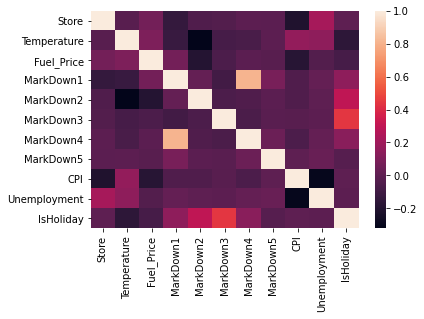

In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy
import os

#correlation heatmap
features = pd.read_csv("features.csv")
corrmatrix = features.corr()
sea.heatmap(corrmatrix, annot=False)
plt.savefig('FULL_correlation_heatmap.png')

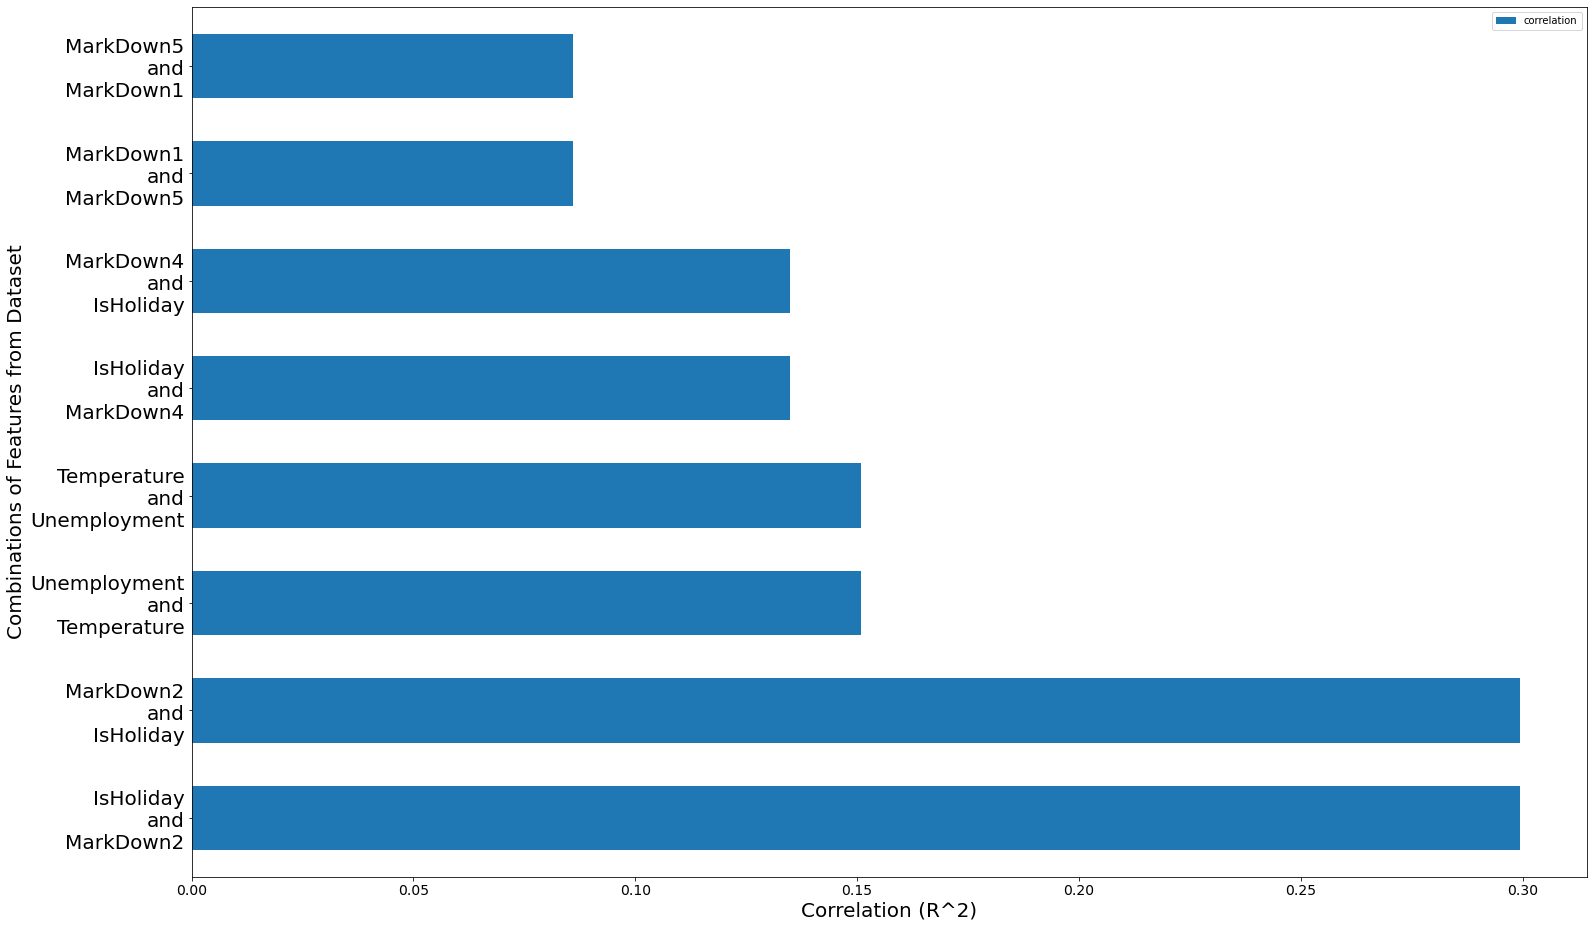

In [2]:
#correlation bar chart
corrmatrix = pd.read_csv("correlation_matrix.csv")
list_of_indexes = []
for i in range(0,121):
    list_of_indexes.append(i)
corrmatrix = corrmatrix.replace(to_replace=corrmatrix.index, value=list_of_indexes, inplace=False, limit=None, regex=False, method='pad')
corrmatrix = corrmatrix.loc[corrmatrix['correlation'] != 1, :]
cleaned_correlation_matrix = None
list_of_want_indexes = []
for i in range(0,121,2):
    list_of_want_indexes.append(i)
for index in list_of_want_indexes:
    temp_correlation_matrix = corrmatrix.loc[corrmatrix['index'] == index, :]
    cleaned_correlation_matrix = pd.concat([cleaned_correlation_matrix, temp_correlation_matrix], axis=0)
cleaned_correlation_matrix.sort_values(by=['correlation'], inplace=True, ascending=False)
cleaned_correlation_matrix.to_csv("cleaned_correlation_matrix.csv")

cleaned_correlation_matrix = cleaned_correlation_matrix.head(8)
cleaned_correlation_matrix['feature_both'] = cleaned_correlation_matrix['feature_1'] + "\nand\n" + cleaned_correlation_matrix['feature_2']
cleaned_correlation_matrix.drop(columns=['feature_1', 'feature_2', 'index'])
cleaned_correlation_matrix.plot(kind='barh', x='feature_both', y='correlation', figsize=(25,16), width=.6)
plt.xlabel('Correlation (R^2)', fontsize=20)
plt.ylabel('Combinations of Features from Dataset', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=14)
plt.savefig('correlation_bar_chart.png')

In [3]:
#splitting training and testing data
from sklearn.model_selection import train_test_split

output_train = pd.read_csv("train.csv")

target_data = output_train['IsHoliday']
cont_data = output_train[['Store','Dept','Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(cont_data, target_data, test_size=0.2, random_state=100)
x_train.to_csv('output_train_x.csv' ,index=None)
x_test.to_csv('output_test_x.csv' ,index=None)
y_train.to_csv('output_train_y.csv' ,index=None)
y_test.to_csv('output_test_y.csv',index=None)

In [4]:
#decision tree cross validation
import sklearn as skl
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

output_train_x = pd.read_csv("output_train_x.csv")
output_train_y = pd.read_csv("output_train_y.csv")

print('start')
Decision_Tree_Full_Results = None
for leafnodes in range(4,16):
    for md in range(4,16):
        if os.path.isfile('DecisionTree_crossval/' + str(md) + str(leafnodes) + '.csv') == False:
            clf = tree.DecisionTreeClassifier(max_leaf_nodes=leafnodes, max_depth=md)
            scores = cross_validate(clf, output_train_x,output_train_y, cv=5, scoring='accuracy', return_train_score=True)
            dictionary = {'max_leaf_nodes': [] , 'max_depth':[] , 'train_score': [], 'test_score': []}
            dictionary['max_leaf_nodes'].append(leafnodes)
            dictionary['max_depth'].append(md)
            dictionary['train_score'].append(scores['train_score'].mean())
            dictionary['test_score'].append(scores['test_score'].mean())
            Decision_Tree_Results = pd.DataFrame(dictionary)
            Decision_Tree_Results.to_csv('DecisionTree_crossval/' + str(md) + str(leafnodes) + '.csv', index=None)
        else:
            Decision_Tree_Results = pd.read_csv('DecisionTree_crossval/' + str(md) + str(leafnodes) + '.csv')
        if Decision_Tree_Full_Results is None:
            Decision_Tree_Full_Results = Decision_Tree_Results
        else:
            Decision_Tree_Full_Results = pd.concat([Decision_Tree_Full_Results, Decision_Tree_Results], axis=0)
Decision_Tree_Full_Results.sort_values(by=['test_score'], inplace=True, ascending=False)
Decision_Tree_Full_Results.to_csv('DecisionTree_full_crossval_results.csv', index=None)
print('done')
Decision_Tree_Full_Results


start
done


,max_leaf_nodes,max_depth,train_score,test_score
0,6,6,0.929753,0.929724
0,6,4,0.929753,0.929724
0,6,15,0.929753,0.929724
0,6,14,0.929753,0.929724
0,6,13,0.929753,0.929724
...,...,...,...,...
0,14,11,0.929790,0.929691
0,14,10,0.929790,0.929691
0,14,9,0.929790,0.929691
0,14,8,0.929790,0.929691


In [5]:
#testing best decision tree model

output_test_x = pd.read_csv("output_test_x.csv")
output_test_y = pd.read_csv("output_test_y.csv")

clf = tree.DecisionTreeClassifier(max_leaf_nodes=4, max_depth=4)
scores = cross_validate(clf, output_test_x,output_test_y, cv=5, scoring='accuracy', return_train_score=True)
final_dictionary = {'max_leaf_nodes': [] , 'max_depth':[] , 'train_score': [], 'test_score': []}
final_dictionary['max_leaf_nodes'].append(4)
final_dictionary['max_depth'].append(4)
final_dictionary['train_score'].append(scores['train_score'].mean())
final_dictionary['test_score'].append(scores['test_score'].mean())
Decision_Tree_Final_Model = pd.DataFrame(final_dictionary)
Decision_Tree_Final_Model

,max_leaf_nodes,max_depth,train_score,test_score
0,4,4,0.929626,0.929608
